# Prediction with Linear Regression and Cousines

1. Simple Linear Regression(LR)

  📌 It is to find the linear function that expresses the relationship between the dependent and independent variable.

2. Multiple Linear Regression(MLR)

  📌 It is to find the linear function that expresses the relationship between dependent and independent variables.

3. Principal Component Regression(PCR)

  📌 It is based on the idea of establishing a regression model for the resulting components after dimension reduction is applied to the variables.

4. Partial Least Squares Regression(PLS)

  📌 It is based on the idea of establishing a regression model by reducing the variables to a smaller number of components that do not have multicollinearity problems between them.

5. Ridge Regression

  📌 It is to find the sum squares error by applying the minimizing coefficients and a penalty to these coefficients.

6. Lasso Regression

  📌 It is to find the sum squares error by applying the minimizing coefficients and a penalty to these coefficients.

7. ElasticNet Regression

  📌 It is to find the sum squares error by applying the minimizing coefficients and a penalty to these coefficients. ElasticNet combines L1 and L2 approaches.

8. Support Vector Regression(SVR)

  📌 The goal is to define the curve so that it can get the maximum point in the range of a margin with the smallest error.

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

## Import Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000


## General Information About to the Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
        TV   radio  newspaper   sales
0 230.1000 37.8000    69.2000 22.1000
1  44.5000 39.3000    45.1000 10.4000
2  17.2000 45.9000    69.3000  9.3000
3 151.5000 41.3000    58.5000 18.5000
4 180.8000 10.8000    58.4000 12.9000
######################### Tail #########################
          TV   radio  newspaper   sales
195  38.2000  3.7000    13.8000  7.6000
196  94.2000  4.9000     8.1000  9.7000
197 177.0000  9.3000     6.4000 12.8000
198 283.6000 42.0000    66.2000 25.5000
199 232.1000  8.6000     8.7000 13.4000
######################### Shape #########################
(200, 4)
######################### Types #########################
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
######################### NA #########################
TV           0
radio        0
newspaper    0
sales        0
dtype: int64
######################### Qurtiles #########################
      

## Analysis of Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 200
Variables: 4
Cat_cols: 0
Num_cols: 4
Cat_but_car: 0


In [7]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [8]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   200.0000
mean    147.0425
std      85.8542
min       0.7000
1%        5.3870
5%       13.1950
10%      24.8800
20%      59.1800
30%      86.7500
40%     119.0000
50%     149.7500
60%     186.0600
70%     210.7300
80%     228.5400
90%     261.4400
95%     280.7350
99%     292.9070
max     296.4000
Name: TV, dtype: float64


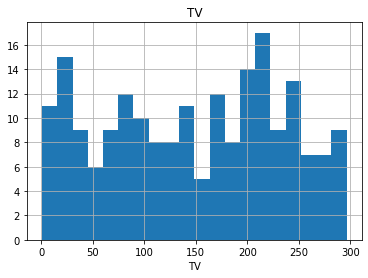

count   200.0000
mean     23.2640
std      14.8468
min       0.0000
1%        0.3990
5%        1.9950
10%       3.4000
20%       7.6800
30%      11.9400
40%      17.1200
50%      22.9000
60%      27.8600
70%      33.5000
80%      38.9200
90%      43.5200
95%      46.8100
99%      49.4000
max      49.6000
Name: radio, dtype: float64


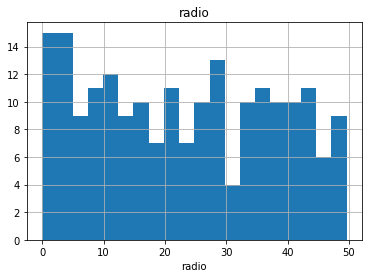

count   200.0000
mean     30.5540
std      21.7786
min       0.3000
1%        0.9990
5%        3.6000
10%       5.9900
20%       9.3800
30%      15.9700
40%      21.3200
50%      25.7500
60%      32.7000
70%      39.1100
80%      49.6400
90%      59.0700
95%      71.8250
99%      89.5150
max     114.0000
Name: newspaper, dtype: float64


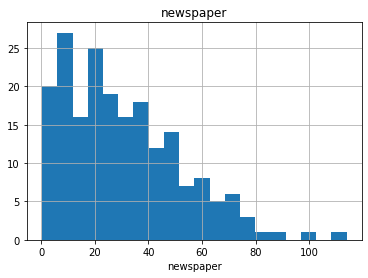

count   200.0000
mean     14.0225
std       5.2175
min       1.6000
1%        4.7840
5%        6.6000
10%       7.9600
20%       9.7000
30%      10.8700
40%      11.8000
50%      12.9000
60%      14.8000
70%      16.6000
80%      18.9200
90%      21.7100
95%      23.8000
99%      25.5070
max      27.0000
Name: sales, dtype: float64


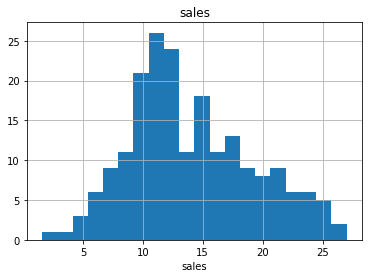

In [9]:
num_summary_df(df)

## Correlation Analysis

In [10]:
def Correlation_Analysis(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  print(dataframe[num_cols].corr())
  print("################################################")
  print(dataframe[num_cols].corrwith(dataframe[target]).sort_values(ascending=False))

  f, ax = plt.subplots(figsize=[18, 13])
  sns.heatmap(dataframe[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
  ax.set_title("Correlation Matrix", fontsize=20)
  plt.show()

  sns.pairplot(dataframe, kind="reg");

  for col in num_cols:
    sns.jointplot(x=col, y=target, data=dataframe, kind="reg");

              TV  radio  newspaper  sales
TV        1.0000 0.0548     0.0566 0.7822
radio     0.0548 1.0000     0.3541 0.5762
newspaper 0.0566 0.3541     1.0000 0.2283
sales     0.7822 0.5762     0.2283 1.0000
################################################
sales       1.0000
TV          0.7822
radio       0.5762
newspaper   0.2283
dtype: float64


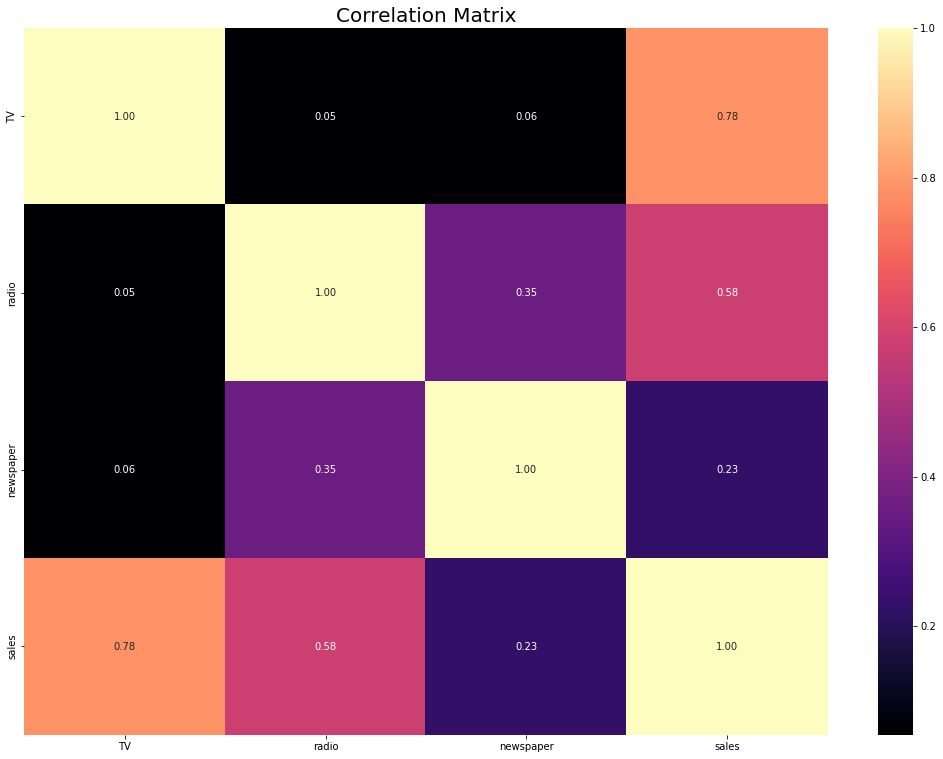

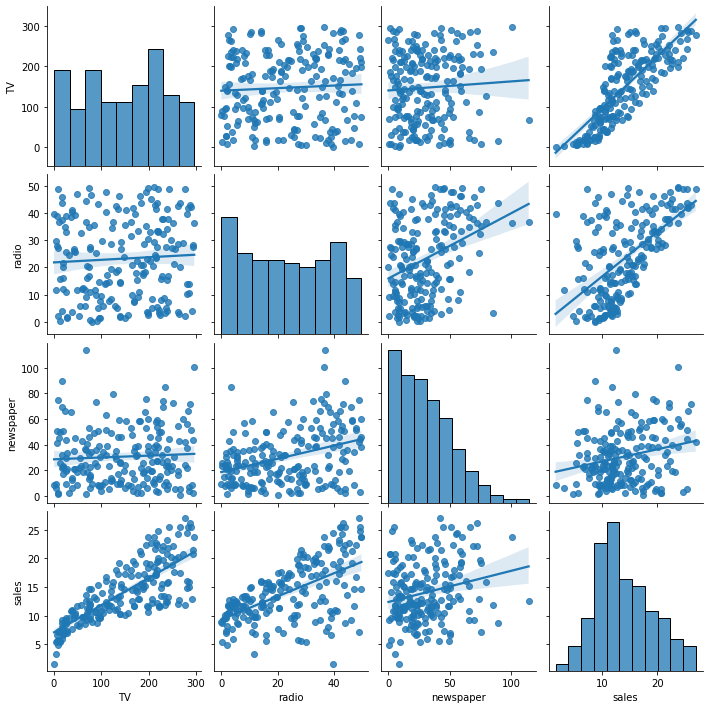

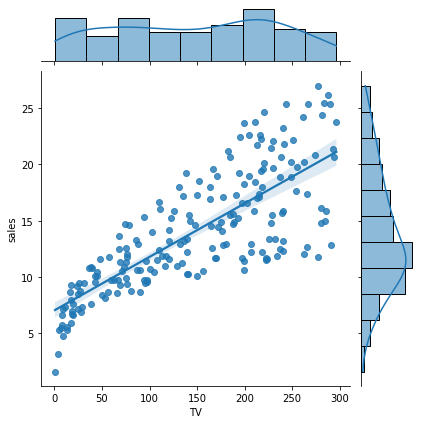

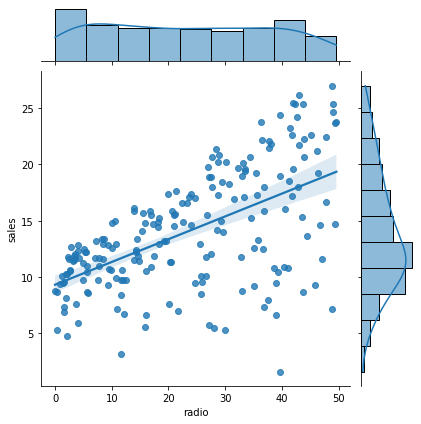

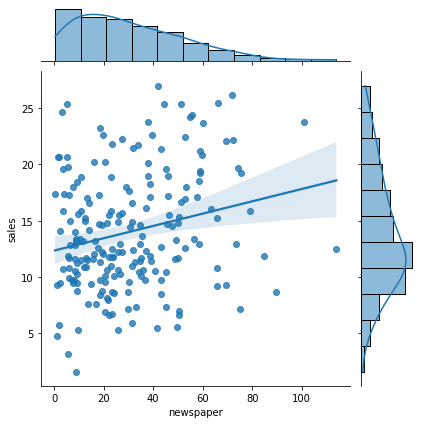

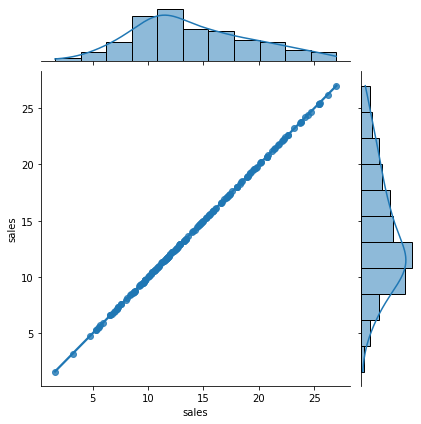

In [11]:
Correlation_Analysis(df, "sales")

# Simple Linear Regression(LR)

📌 It is to find the linear function that expresses the relationship between the dependent and independent variable.

### Modeling with statsmodel

In [12]:
def simple_LR_modeling_with_statsmodel(dataframe, X, y, results=False, plot=False):
  X_col = X
  y_col = y
  X = dataframe[[X]]
  X = sm.add_constant(X)
  y = dataframe[y]
  lm = sm.OLS(y, X)
  model = lm.fit()
  model_equation = str(y_col) + " = " + str("%.2f" % model.params[0]) + " + " + str(X_col) + "*" + str("%.2f" % model.params[1])

  if results:
    print("f_pvalue: ", "%.3f" % model.f_pvalue)
    print("fvalue: ", "%.3f" % model.fvalue)
    print("tvalue: ", "%.3f" % model.tvalues[1])
    print("mse: ", "%.3f" % mean_squared_error(y, model.fittedvalues))
    print("rmse: ", "%.3f" % np.sqrt(mean_squared_error(y, model.fittedvalues)))
    print("Model MSE: ", "%.3f" % model.mse_model)
    print("Model rsquared: ", "%.3f" % model.rsquared)
    print("Model rsquared_Adj: ", "%.3f" % model.rsquared_adj)
    print("Model Equation: ", model_equation)
    print(model.summary())
  
  if plot:
    g = sns.regplot(x=dataframe[X_col], y=dataframe[y_col], scatter_kws={'color':'r','s':9})
    g.set_title(f"Model Equation:  {model_equation}")
    g.set_ylabel(y_col)
    g.set_xlabel(X_col)
    plt.xlim(dataframe[X_col].min()-10, dataframe[X_col].max()+10)
    plt.ylim(bottom=0)
    plt.show()
    plt.plot(model.resid)
    plt.title("Resid Plot")
  
  return model


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


f_pvalue:  0.000
fvalue:  312.145
tvalue:  17.668
mse:  10.513
rmse:  3.242
Model MSE:  3314.618
Model rsquared:  0.612
Model rsquared_Adj:  0.610
Model Equation:  sales = 7.03 + TV*0.05
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        06:43:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

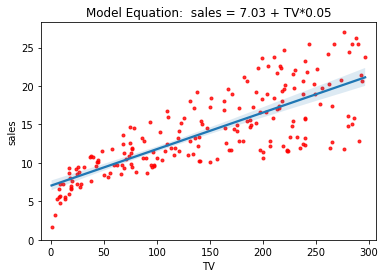

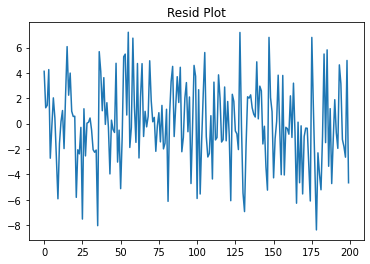

In [13]:
model = simple_LR_modeling_with_statsmodel(df, X="TV", y="sales", results=True, plot=True)

### Modeling with LinearRegression

In [14]:
def simple_LR_modeling_with_LinearRegression(dataframe, X, y, results=False, plot=False):
  X_col = X
  y_col = y
  X = dataframe[[X]]
  y = dataframe[y]
  reg = LinearRegression()
  model = reg.fit(X.values, y)
  model_equation = str(y_col) + " = " + str("%.2f" % model.intercept_) + " + " + str(X_col) + "*" + str("%.2f" % model.coef_)

  if results:
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r_sqaure = model.score(X, y)
    print("MSE: ", "%.3f" % mse)
    print("RMSE: ", "%.3f" % rmse)
    print("MAE: ", "%.3f" % mae)
    print("R-Sqaure: ", "%.3f" % r_sqaure)

  if plot:
    g = sns.regplot(x=dataframe[X_col], y=dataframe[y_col], scatter_kws={'color':'r','s':9})
    g.set_title(f"Model Equation:  {model_equation}")
    g.set_ylabel(y_col)
    g.set_xlabel(X_col)
    plt.xlim(dataframe[X_col].min()-10, dataframe[X_col].max()+10)
    plt.ylim(bottom=0)
  return model

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MSE:  10.513
RMSE:  3.242
MAE:  2.550
R-Sqaure:  0.612


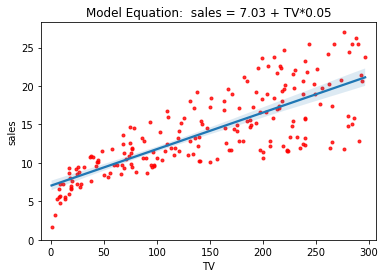

In [15]:
model = simple_LR_modeling_with_LinearRegression(df, "TV", "sales", results=True, plot=True)

In [16]:
def model_LR_predict(dataframe, X, y, value):
  model = simple_LR_modeling_with_LinearRegression(dataframe, X, y)
  print("Predict : " , model.predict([[value]])[0])

In [17]:
model_LR_predict(df, "TV", "sales", 150)

Predict :  14.163089614080658


# Multiple Linear Regression(MLR)

📌 It is to find the linear function that expresses the relationship between dependent and independent variables.

### Modeling with statsmodel

In [18]:
def MLR_modeling_with_statsmodel(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lm = sm.OLS(y_train, X_train)
  model = lm.fit()

  if results:
    print("f_pvalue: ", "%.3f" % model.f_pvalue)
    print("fvalue: ", "%.3f" % model.fvalue)
    print("tvalue: ", "%.3f" % model.tvalues[1])
    print("Model MSE: ", "%.3f" % model.mse_model)
    print("Model rsquared: ", "%.3f" % model.rsquared)
    print("Model rsquared_Adj: ", "%.3f" % model.rsquared_adj)
    print(model.summary())
  
  return model

In [19]:
model = MLR_modeling_with_statsmodel(df, "sales", results=True)

f_pvalue:  0.000
fvalue:  2584.220
tvalue:  18.931
Model MSE:  11486.904
Model rsquared:  0.980
Model rsquared_Adj:  0.980
                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2584.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):                   2.35e-133
Time:                        06:43:21   Log-Likelihood:                         -344.86
No. Observations:                 160   AIC:                                      695.7
Df Residuals:                     157   BIC:                                      704.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                

### Modeling with LinearRegression

In [20]:
def MLR_modeling_with_LinearRegression(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lm = LinearRegression()
  model = lm.fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, model.predict(X_train))
    mae_test = mean_absolute_error(y_test, model.predict(X_test))
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  return model

In [21]:
model = MLR_modeling_with_LinearRegression(df, "sales", results=True)

MSE_train:  3.017
RMSE_train:  1.737
MSE_test:  1.992
RMSE_test:  1.411
MAE_train:  1.329
MAE_test:  1.040
R2:  0.896
R2_train:  0.896
R2_test:  0.893


In [22]:
def model_MLR_predict(dataframe, values, target):
  values = pd.DataFrame(values).T
  model = MLR_modeling_with_LinearRegression(dataframe, target)
  print("Predict : " , model.predict(values)[0])

In [23]:
model_MLR_predict(df, [[30],[10],[40]], "sales")

Predict :  6.202130997974466


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
def MLR_model_tuning(dataframe, target, cv=10, scoring="r2"):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  model = MLR_modeling_with_LinearRegression(dataframe, target)
  print("################### All Dataset ###################")
  print("R2: ", "%.3f" % cross_val_score(model, X, y, cv=cv, scoring="r2").mean())
  print("RMSE: ", "%.3f" % np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error").mean()))
  print("################### Train Dataset ###################")
  print("R2: ", "%.3f" % cross_val_score(model, X_train, y_train, cv=cv, scoring="r2").mean())
  print("RMSE: ", "%.3f" % np.sqrt(-cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_squared_error").mean()))
  print("################### Test Dataset ###################")
  print("R2: ", "%.3f" % cross_val_score(model, X_test, y_test, cv=cv, scoring="r2").mean())
  print("RMSE: ", "%.3f" % np.sqrt(-cross_val_score(model, X_test, y_test, cv=cv, scoring="neg_mean_squared_error").mean()))

In [25]:
MLR_model_tuning(df, "sales")

################### All Dataset ###################
R2:  0.885
RMSE:  1.749
################### Train Dataset ###################
R2:  0.884
RMSE:  1.785
################### Test Dataset ###################
R2:  0.761
RMSE:  1.308


# Simple Linear Regression with Gradient Descent from Scratch


In [26]:
# Cost Function(MSE)
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse

In [27]:
# Update Weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [28]:
# Train Function
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [29]:
dff = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/advertising.csv")

X = dff["radio"]
Y = dff["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25

## Import Necessary Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.svm import SVR

## Import Dataset

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5000,N


## General Information About to the Dataset

In [32]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [33]:
check_df(df)

######################### Head #########################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors   Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20      NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.0000         N
2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.0000         A
3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.0000         N
4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E      805       40       4  91.5000         N
######################### Tail 

## Analysis of Categorical and Numerical Variables

In [34]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 322
Variables: 20
Cat_cols: 3
Num_cols: 17
Cat_but_car: 0


In [36]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [37]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   League  Ration
A     175 54.3478
N     147 45.6522
##########################################


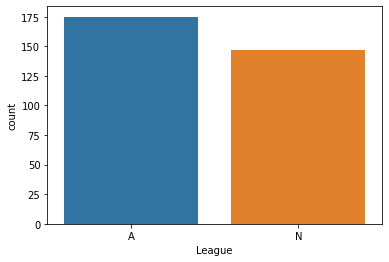

   Division  Ration
W       165 51.2422
E       157 48.7578
##########################################


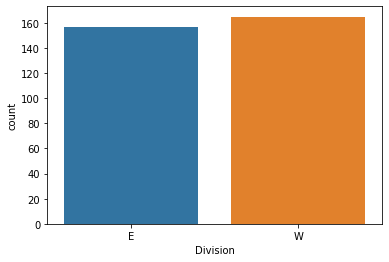

   NewLeague  Ration
A        176 54.6584
N        146 45.3416
##########################################


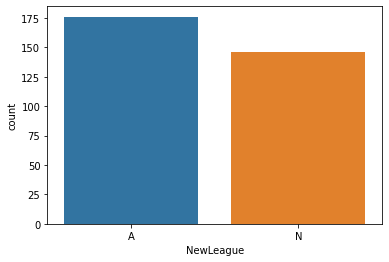

In [38]:
cat_summary_df(df)

In [39]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [40]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   322.0000
mean    380.9286
std     153.4050
min      16.0000
1%       20.4200
5%      161.0000
10%     194.1000
20%     221.8000
30%     281.3000
40%     321.8000
50%     379.5000
60%     430.2000
70%     490.0000
80%     535.6000
90%     584.9000
95%     609.9000
99%     658.5900
max     687.0000
Name: AtBat, dtype: float64


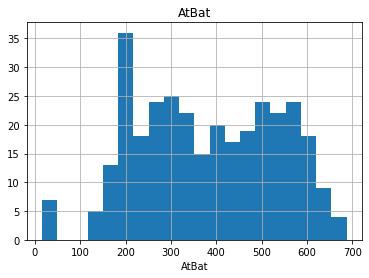

count   322.0000
mean    101.0248
std      46.4547
min       1.0000
1%        4.4200
5%       39.0000
10%      45.1000
20%      57.0000
30%      70.0000
40%      82.0000
50%      96.0000
60%     113.0000
70%     128.7000
80%     144.0000
90%     163.0000
95%     174.0000
99%     210.7900
max     238.0000
Name: Hits, dtype: float64


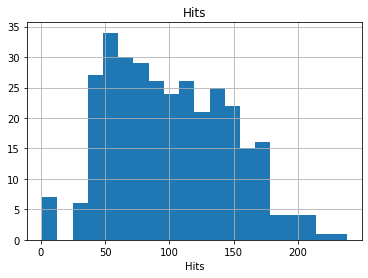

count   322.0000
mean     10.7702
std       8.7090
min       0.0000
1%        0.0000
5%        0.0000
10%       1.0000
20%       3.0000
30%       5.0000
40%       6.0000
50%       8.0000
60%      10.6000
70%      14.0000
80%      18.0000
90%      24.0000
95%      28.9500
99%      33.0000
max      40.0000
Name: HmRun, dtype: float64


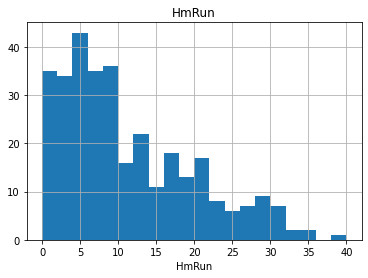

count   322.0000
mean     50.9099
std      26.0241
min       0.0000
1%        1.2100
5%       17.0000
10%      20.1000
20%      27.0000
30%      33.0000
40%      41.0000
50%      48.0000
60%      55.6000
70%      66.0000
80%      75.8000
90%      89.0000
95%      94.0000
99%     107.7900
max     130.0000
Name: Runs, dtype: float64


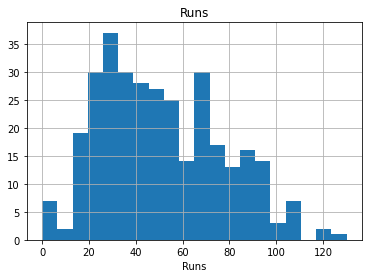

count   322.0000
mean     48.0280
std      26.1669
min       0.0000
1%        2.0000
5%       14.0000
10%      19.0000
20%      26.0000
30%      30.0000
40%      36.4000
50%      44.0000
60%      49.0000
70%      58.0000
80%      73.0000
90%      86.0000
95%      96.0000
99%     112.3700
max     121.0000
Name: RBI, dtype: float64


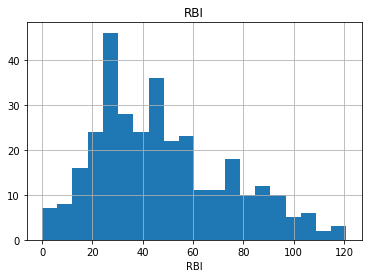

count   322.0000
mean     38.7422
std      21.6393
min       0.0000
1%        1.0000
5%       11.0500
10%      15.0000
20%      20.0000
30%      24.0000
40%      30.0000
50%      35.0000
60%      40.0000
70%      48.7000
80%      59.0000
90%      69.9000
95%      78.0000
99%      93.5800
max     105.0000
Name: Walks, dtype: float64


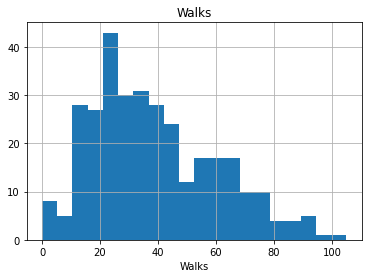

count   322.0000
mean      7.4441
std       4.9261
min       1.0000
1%        1.0000
5%        1.0000
10%       2.0000
20%       3.0000
30%       4.0000
40%       5.0000
50%       6.0000
60%       7.6000
70%      10.0000
80%      12.0000
90%      15.0000
95%      17.0000
99%      19.7900
max      24.0000
Name: Years, dtype: float64


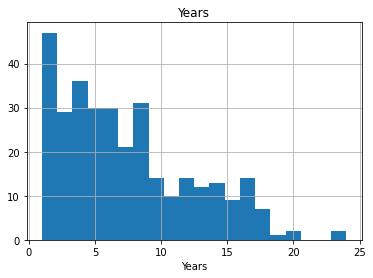

count     322.0000
mean     2648.6832
std      2324.2059
min        19.0000
1%         41.0000
5%        216.5000
10%       342.2000
20%       667.6000
30%       963.4000
40%      1402.2000
50%      1928.0000
60%      2654.0000
70%      3365.0000
80%      4483.0000
90%      6123.4000
95%      7125.6000
99%      8749.9700
max     14053.0000
Name: CAtBat, dtype: float64


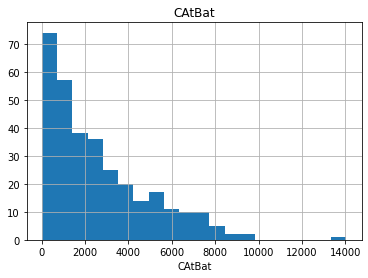

count    322.0000
mean     717.5714
std      654.4726
min        4.0000
1%         9.8400
5%        54.0000
10%       86.0000
20%      164.6000
30%      238.0000
40%      355.8000
50%      508.0000
60%      708.2000
70%      911.1000
80%     1229.2000
90%     1659.6000
95%     2017.1500
99%     2500.3400
max     4256.0000
Name: CHits, dtype: float64


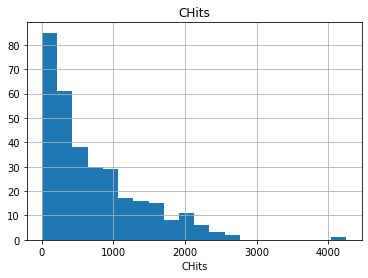

count   322.0000
mean     69.4907
std      86.2661
min       0.0000
1%        0.0000
5%        2.0000
10%       4.0000
20%      10.2000
30%      16.3000
40%      27.4000
50%      37.5000
60%      51.2000
70%      72.4000
80%     103.8000
90%     194.9000
95%     265.6500
99%     373.1200
max     548.0000
Name: CHmRun, dtype: float64


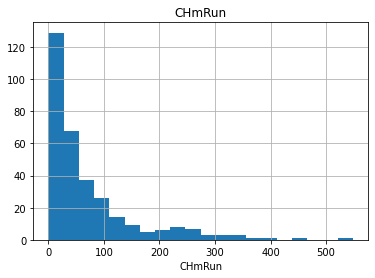

count    322.0000
mean     358.7950
std      334.1059
min        1.0000
1%         3.6300
5%        27.0000
10%       38.1000
20%       80.4000
30%      117.3000
40%      181.0000
50%      247.0000
60%      333.0000
70%      443.4000
80%      627.2000
90%      895.7000
95%     1032.3000
99%     1174.3700
max     2165.0000
Name: CRuns, dtype: float64


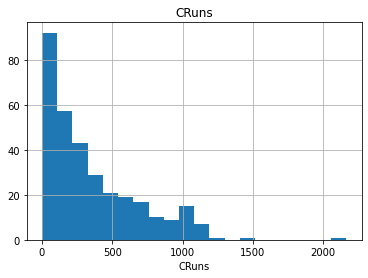

count    322.0000
mean     330.1180
std      333.2196
min        0.0000
1%         4.6300
5%        22.0500
10%       34.1000
20%       70.2000
30%      106.3000
40%      149.0000
50%      220.5000
60%      303.6000
70%      379.1000
80%      496.2000
90%      861.6000
95%     1071.7500
99%     1310.8500
max     1659.0000
Name: CRBI, dtype: float64


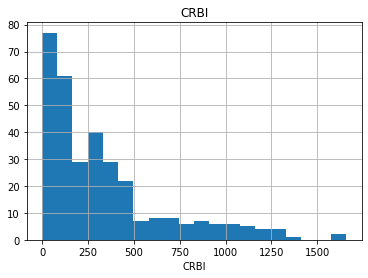

count    322.0000
mean     260.2391
std      267.0581
min        0.0000
1%         4.0000
5%        15.0500
10%       30.1000
20%       55.0000
30%       82.0000
40%      117.4000
50%      170.5000
60%      226.6000
70%      300.7000
80%      421.0000
90%      643.9000
95%      817.6000
99%     1139.1400
max     1566.0000
Name: CWalks, dtype: float64


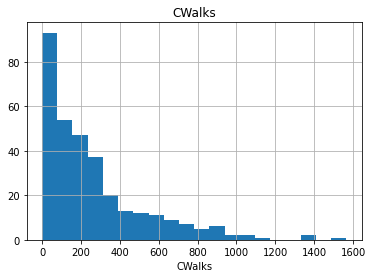

count    322.0000
mean     288.9379
std      280.7046
min        0.0000
1%         0.0000
5%        33.2000
10%       62.2000
20%       99.6000
30%      132.0000
40%      167.0000
50%      212.0000
60%      257.4000
70%      303.0000
80%      365.8000
90%      685.6000
95%      910.6500
99%     1301.1900
max     1378.0000
Name: PutOuts, dtype: float64


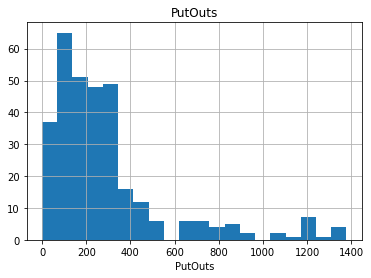

count   322.0000
mean    106.9130
std     136.8549
min       0.0000
1%        0.0000
5%        0.0000
10%       2.0000
20%       5.2000
30%       9.0000
40%      15.4000
50%      39.5000
60%      76.8000
70%     134.8000
80%     210.8000
90%     353.3000
95%     431.4500
99%     478.1600
max     492.0000
Name: Assists, dtype: float64


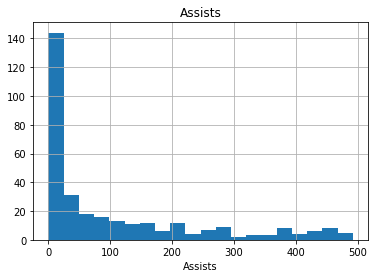

count   322.0000
mean      8.0404
std       6.3684
min       0.0000
1%        0.0000
5%        0.0000
10%       1.0000
20%       3.0000
30%       4.0000
40%       5.0000
50%       6.0000
60%       8.0000
70%      10.0000
80%      13.0000
90%      17.0000
95%      20.0000
99%      25.7900
max      32.0000
Name: Errors, dtype: float64


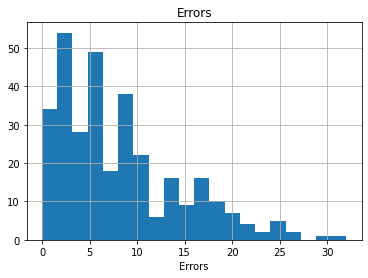

count    263.0000
mean     535.9259
std      451.1187
min       67.5000
1%        70.0000
5%        86.6000
10%      100.0000
20%      155.0000
30%      221.0000
40%      300.0000
50%      425.0000
60%      538.0000
70%      700.0000
80%      809.0000
90%     1048.6666
95%     1346.0000
99%     2032.8865
max     2460.0000
Name: Salary, dtype: float64


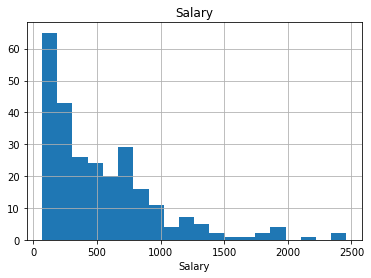

In [41]:
num_summary_df(df)

In [42]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(categorical_col)
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                      "Count": dataframe[categorical_col].value_counts(),
                      "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}))
  print("#############################################")

In [43]:
def target_summary_with_cat_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    target_summary_with_cat(dataframe, target, col)

In [44]:
target_summary_with_cat_df(df, "Salary")

League
   TARGET_MEAN  Count   Ratio
A     541.9995    175 54.3478
N     529.1175    147 45.6522
#############################################
Division
   TARGET_MEAN  Count   Ratio
E     624.2714    157 48.7578
W     450.8769    165 51.2422
#############################################
NewLeague
   TARGET_MEAN  Count   Ratio
A     537.1130    176 54.6584
N     534.5539    146 45.3416
#############################################


## Correlation Analysis

In [45]:
df[num_cols].corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.0000,0.9679,0.5922,0.9131,0.8205,0.6698,0.0474,0.2355,0.2527,0.2367,0.2665,0.2441,0.1661,0.3175,0.3538,0.3521,0.3948
Hits,0.9679,1.0000,0.5622,0.9222,0.8111,0.6412,0.0448,0.2276,0.2558,0.2027,0.2618,0.2320,0.1518,0.3107,0.3205,0.3100,0.4387
HmRun,0.5922,0.5622,1.0000,0.6510,0.8551,0.4810,0.1163,0.2219,0.2206,0.4932,0.2624,0.3520,0.2332,0.2829,-0.1063,0.0393,0.3430
Runs,0.9131,0.9222,0.6510,1.0000,0.7982,0.7322,0.0045,0.1865,0.2048,0.2279,0.2506,0.2060,0.1822,0.2793,0.2206,0.2405,0.4199
RBI,0.8205,0.8111,0.8551,0.7982,1.0000,0.6160,0.1462,0.2947,0.3082,0.4418,0.3233,0.3932,0.2509,0.3432,0.1066,0.1934,0.4495
Walks,0.6698,0.6412,0.4810,0.7322,0.6160,1.0000,0.1365,0.2772,0.2807,0.3325,0.3385,0.3086,0.4245,0.2995,0.1497,0.1294,0.4439
Years,0.0474,0.0448,0.1163,0.0045,0.1462,0.1365,1.0000,0.9203,0.9036,0.7269,0.8829,0.8688,0.8385,-0.0047,-0.0806,-0.1621,0.4007
CAtBat,0.2355,0.2276,0.2219,0.1865,0.2947,0.2772,0.9203,1.0000,0.9951,0.7988,0.9833,0.9492,0.9065,0.0623,0.0020,-0.0669,0.5261
CHits,0.2527,0.2558,0.2206,0.2048,0.3082,0.2807,0.9036,0.9951,1.0000,0.7833,0.9846,0.9451,0.8910,0.0765,-0.0025,-0.0628,0.5489
CHmRun,0.2367,0.2027,0.4932,0.2279,0.4418,0.3325,0.7269,0.7988,0.7833,1.0000,0.8202,0.9295,0.8000,0.1127,-0.1585,-0.1381,0.5249


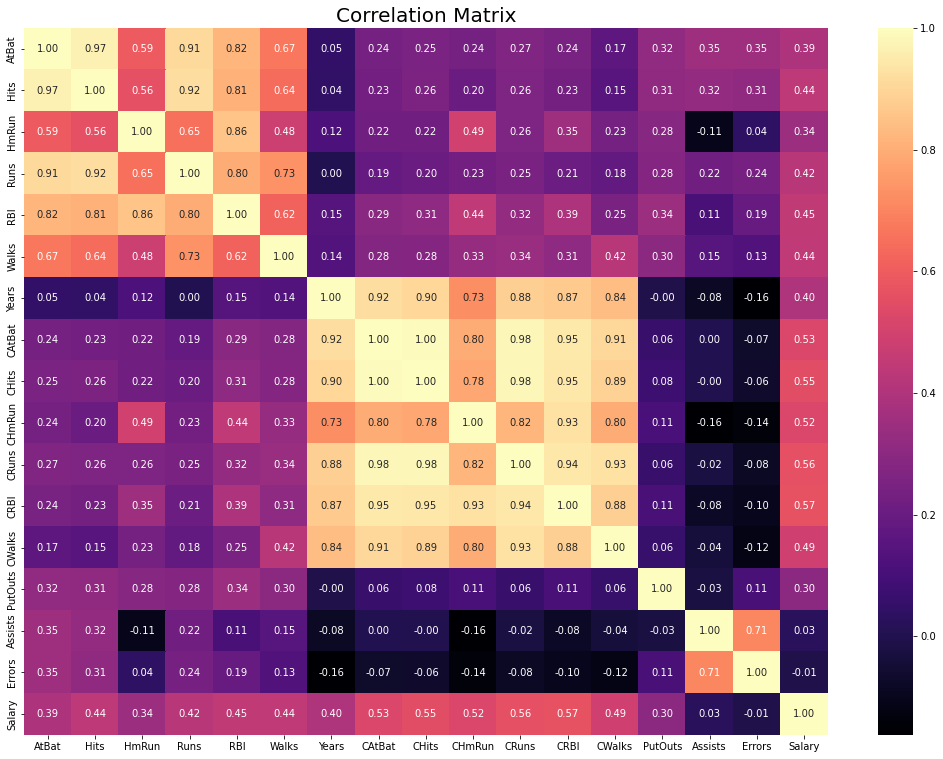

In [46]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [47]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

<ipython-input-47-dcff60c12093>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


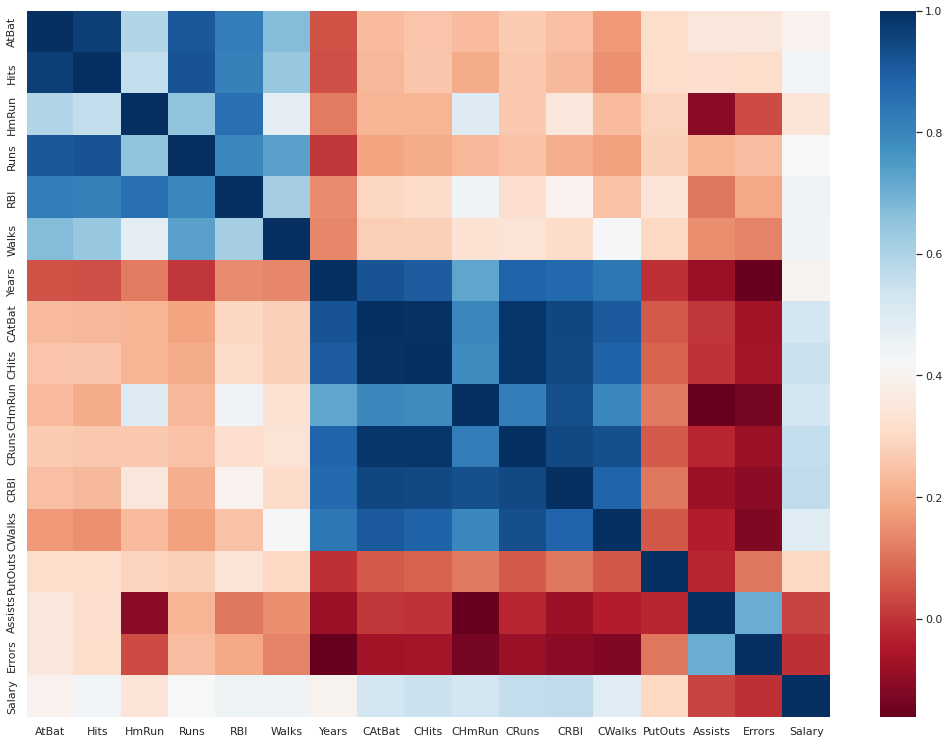

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [48]:
high_correlated_cols(df[num_cols], plot=True)

In [49]:
df.corrwith(df["Salary"]).sort_values(ascending=False)

Salary     1.0000
CRBI       0.5670
CRuns      0.5627
CHits      0.5489
CAtBat     0.5261
CHmRun     0.5249
CWalks     0.4898
RBI        0.4495
Walks      0.4439
Hits       0.4387
Runs       0.4199
Years      0.4007
AtBat      0.3948
HmRun      0.3430
PutOuts    0.3005
Assists    0.0254
Errors    -0.0054
dtype: float64

## Feature Engineering

## Missing Value Analysis

In [50]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [51]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [52]:
na_columns = missing_value_table(df, na_name=True)

        n_miss   ratio
Salary      59 18.3200


In [53]:
df["Salary"].fillna(df["Salary"].median(), inplace=True)

In [54]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

## One-Hot Encoding

In [55]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [56]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [57]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,425.0000,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0000,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0000,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0000,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5000,1,0,1


# Principal Component Regression(PCR)

📌 It is based on the idea of establishing a regression model for the resulting components after dimension reduction is applied to the variables.

In [58]:
def PCR(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  pca_train = PCA()
  pca_test = PCA()
  X_reduced_train = pca_train.fit_transform(scale(X_train))
  X_reduced_test = pca_test.fit_transform(scale(X_test))
  lm = LinearRegression()
  pcr_model = lm.fit(X_reduced_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, pcr_model.predict(X_reduced_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, pcr_model.predict(X_reduced_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, pcr_model.predict(X_reduced_train))
    mae_test = mean_absolute_error(y_test, pcr_model.predict(X_reduced_test))
    r2_train = r2_score(y_train, pcr_model.predict(X_reduced_train))
    r2_test = r2_score(y_test, pcr_model.predict(X_reduced_test))
    print("Reduced Features Train(Ratio): ", np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100))
    print("Reduced Features Test(Ratio): ", np.cumsum(np.round(pca_test.explained_variance_ratio_, decimals=4)*100))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  return pcr_model


In [59]:
pcr_model = PCR(df, "Salary", results=True)

Reduced Features Train(Ratio):  [ 38.47  61.43  71.56  79.88  85.13  89.48  92.91  95.28  96.53  97.47
  98.16  98.76  99.23  99.54  99.77  99.89  99.97  99.99 100.  ]
Reduced Features Test(Ratio):  [ 40.47  59.81  72.03  79.32  84.46  88.75  92.37  95.31  96.95  97.9
  98.64  99.01  99.33  99.59  99.8   99.93  99.97  99.99 100.  ]
MSE_train:  83475.621
RMSE_train:  288.921
MSE_test:  164181.780
RMSE_test:  405.194
MAE_train:  211.945
MAE_test:  286.848
R2_train:  0.434
R2_test:  0.319


In [60]:
def PCR_model_tuning(dataframe, target, n_splits=10, results=False, plot=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  pca_train = PCA()
  pca_test = PCA()
  X_reduced_train = pca_train.fit_transform(scale(X_train))
  X_reduced_test = pca_test.fit_transform(scale(X_test))
  lm = LinearRegression()
  cv = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=1)
  RMSE = []
  for i in np.arange(1, X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, X_reduced_train[:,:i], y_train.ravel(),
                                                       cv=cv, scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
  
  min_RMSE_index = np.argmin(RMSE)
  lm = LinearRegression()
  pcr_model = lm.fit(X_reduced_train[:,0:min_RMSE_index], y_train)

  if results:
    mse_train = mean_squared_error(y_train, pcr_model.predict(X_reduced_train[:,0:min_RMSE_index]))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, pcr_model.predict(X_reduced_test[:,0:min_RMSE_index]))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, pcr_model.predict(X_reduced_train[:,0:min_RMSE_index]))
    mae_test = mean_absolute_error(y_test, pcr_model.predict(X_reduced_test[:,0:min_RMSE_index]))
    r2_train = r2_score(y_train, pcr_model.predict(X_reduced_train[:,0:min_RMSE_index]))
    r2_test = r2_score(y_test, pcr_model.predict(X_reduced_test[:,0:min_RMSE_index]))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  if plot:
    plt.plot(RMSE,'-v')
    plt.xlabel("Number of Components")
    plt.ylabel("RMSE")
    plt.title("PCR Model Tuning")

  return RMSE

MSE_train:  90054.331
RMSE_train:  300.091
MSE_test:  154463.012
RMSE_test:  393.018
MAE_train:  215.680
MAE_test:  273.216
R2_train:  0.389
R2_test:  0.359


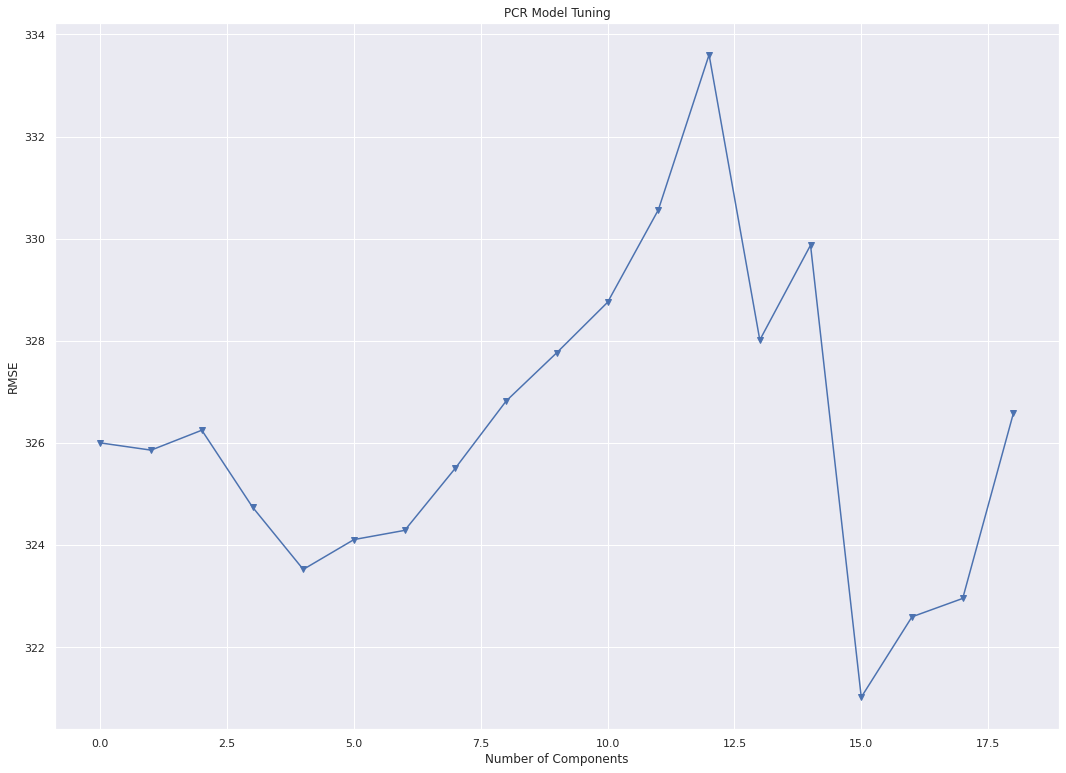

In [61]:
RMSE = PCR_model_tuning(df, "Salary", results=True, plot=True)

# Partial Least Squares Regression(PLS)

📌 It is based on the idea of establishing a regression model by reducing the variables to a smaller number of components that do not have multicollinearity problems between them.

In [62]:
def PLS(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lm = PLSRegression()
  pls_model = lm.fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, pls_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, pls_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, pls_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, pls_model.predict(X_test))
    r2_train = r2_score(y_train, pls_model.predict(X_train))
    r2_test = r2_score(y_test, pls_model.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  return pls_model


In [63]:
pls_model = PLS(df, "Salary", results=True)

MSE_train:  96373.128
RMSE_train:  310.440
MSE_test:  136208.115
RMSE_test:  369.064
MAE_train:  218.417
MAE_test:  260.056
R2_train:  0.346
R2_test:  0.435


In [64]:
def PLS_model_tuning(dataframe, target, n_splits=10, results=False, plot=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  cv = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=1)
  RMSE = []
  for i in np.arange(1, X_train.shape[1]+1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*model_selection.cross_val_score(pls, X_train, y_train,
                                                       cv=cv, scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
  
  min_RMSE_index = np.argmin(RMSE)
  lm = PLSRegression(n_components=min_RMSE_index)
  pls_model = lm.fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, pls_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, pls_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, pls_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, pls_model.predict(X_test))
    r2_train = r2_score(y_train, pls_model.predict(X_train))
    r2_test = r2_score(y_test, pls_model.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  if plot:
    plt.plot(RMSE,'-v')
    plt.xlabel("Number of Components")
    plt.ylabel("RMSE")
    plt.title("PCR Model Tuning")

  return RMSE

MSE_train:  84254.938
RMSE_train:  290.267
MSE_test:  132563.986
RMSE_test:  364.093
MAE_train:  211.898
MAE_test:  265.915
R2_train:  0.428
R2_test:  0.450


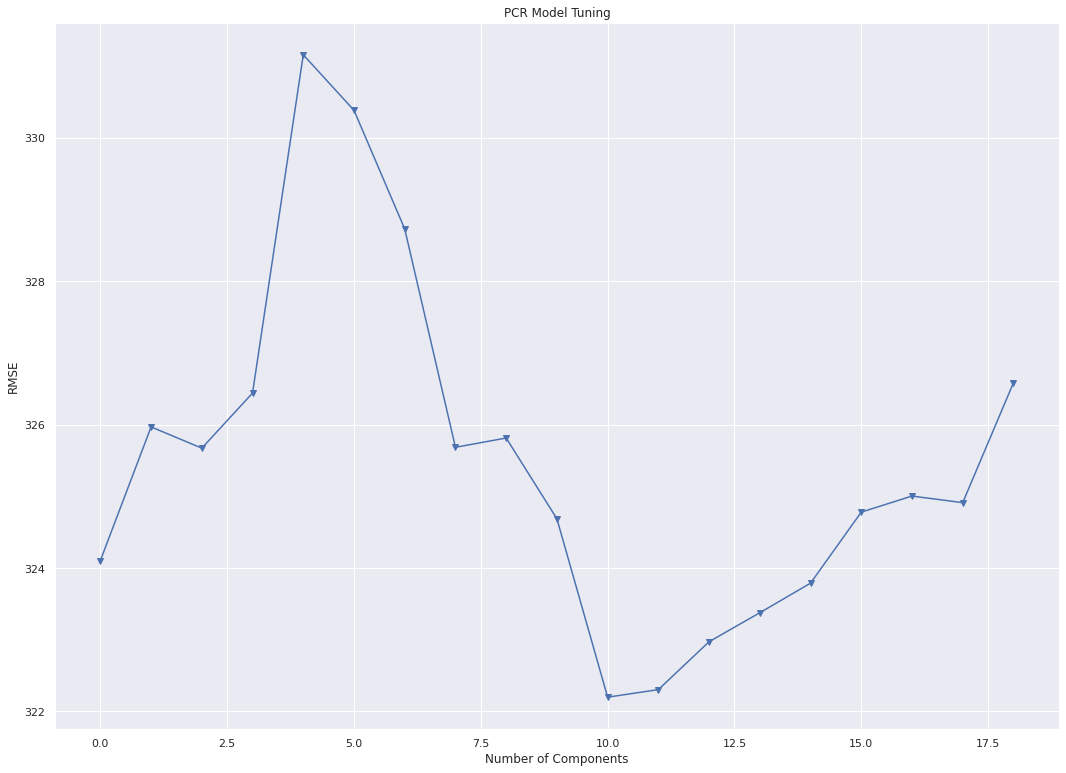

In [65]:
RMSE = PLS_model_tuning(df, "Salary", results=True, plot=True)

# Ridge Regression

📌 It is to find the sum squares error by applying the minimizing coefficients and a penalty to these coefficients.

In [66]:
def Ridge_Regression(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, ridge_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, ridge_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, ridge_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, ridge_model.predict(X_test))
    r2_train = r2_score(y_train, ridge_model.predict(X_train))
    r2_test = r2_score(y_test, ridge_model.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  return ridge_model


In [67]:
ridge_model = Ridge_Regression(df, "Salary", results=True)

MSE_train:  83475.636
RMSE_train:  288.922
MSE_test:  131426.292
RMSE_test:  362.528
MAE_train:  211.940
MAE_test:  262.926
R2_train:  0.434
R2_test:  0.455


In [68]:
def Ridge_model_tuning(dataframe, target, results=False, plot=False):
  import warnings
  warnings.filterwarnings("ignore")
  
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lambdas = 10**np.linspace(10,-2,100)*0.5
  ridge_model = RidgeCV(alphas=lambdas, scoring="neg_mean_squared_error", normalize=True).fit(X_train, y_train)
  ridge_tuned = Ridge(alpha=ridge_model.alpha_, normalize=True).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, ridge_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, ridge_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, ridge_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, ridge_tuned.predict(X_test))
    r2_train = r2_score(y_train, ridge_tuned.predict(X_train))
    r2_test = r2_score(y_test, ridge_tuned.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  coefficients = []
  if plot:
    ridge_model = Ridge()
    for i in lambdas:
      ridge_model.set_params(alpha=i)
      ridge_model.fit(X_train, y_train)
      coefficients.append(ridge_model.coef_)
    ax = plt.gca()
    ax.plot(lambdas, coefficients)
    ax.set_xscale("log")
    plt.xlabel("Lambda(Alpha) Values")
    plt.ylabel("Coefficients(Weights)")
    plt.title("Ridge Coefficients")
  
  return coefficients


MSE_train:  85039.915
RMSE_train:  291.616
MSE_test:  130364.448
RMSE_test:  361.060
MAE_train:  211.280
MAE_test:  263.514
R2_train:  0.423
R2_test:  0.459


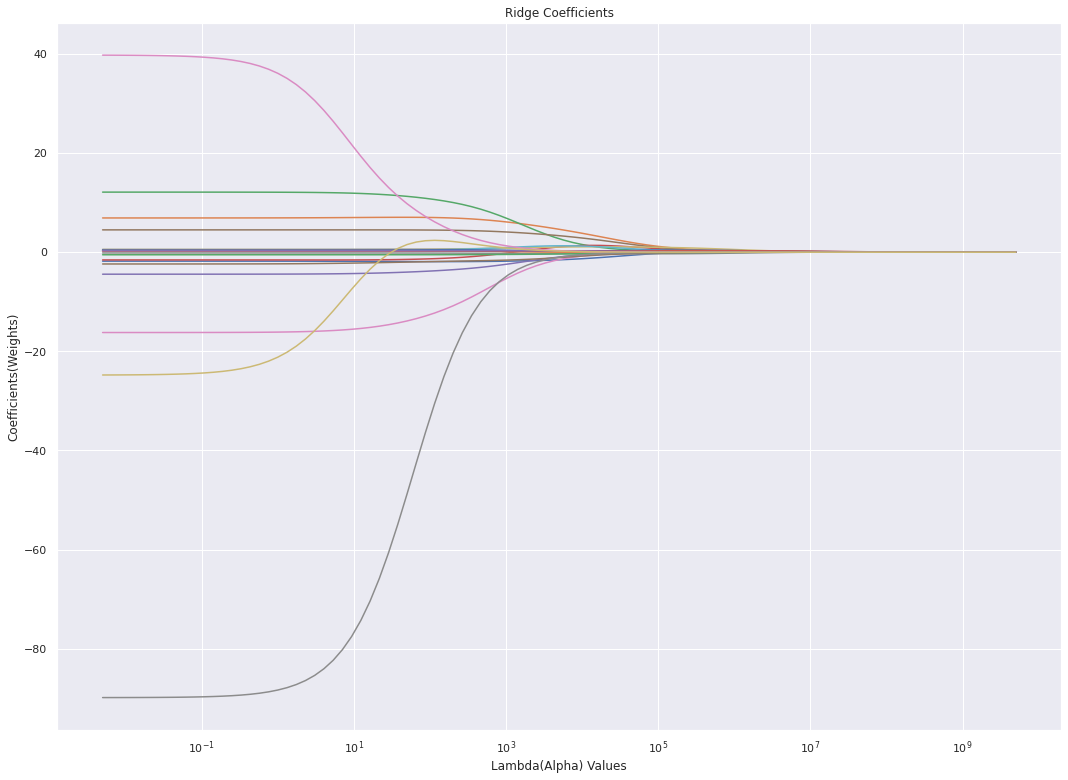

In [69]:
coef = Ridge_model_tuning(df, "Salary", results=True, plot=True)

# Lasso Regression

📌 It is to find the sum squares error by applying the minimizing coefficients and a penalty to these coefficients.

In [70]:
def Lasso_Regression(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, lasso_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, lasso_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, lasso_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, lasso_model.predict(X_test))
    r2_train = r2_score(y_train, lasso_model.predict(X_train))
    r2_test = r2_score(y_test, lasso_model.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  return lasso_model


In [71]:
lasso_model = Lasso_Regression(df, "Salary", results=True)

MSE_train:  83476.701
RMSE_train:  288.923
MSE_test:  131432.656
RMSE_test:  362.536
MAE_train:  211.925
MAE_test:  262.802
R2_train:  0.434
R2_test:  0.455


In [72]:
def Lasso_model_tuning(dataframe, target, cv=10, max_iter=10000, results=False, plot=False):
  import warnings
  warnings.filterwarnings("ignore")
  
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lambdas = 10**np.linspace(10,-2,100)*0.5
  lasso_model = LassoCV(alphas=lambdas, cv=cv, max_iter=max_iter, normalize=True).fit(X_train, y_train)
  lasso_tuned = Lasso(alpha=lasso_model.alpha_, normalize=True).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, lasso_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, lasso_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, lasso_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, lasso_tuned.predict(X_test))
    r2_train = r2_score(y_train, lasso_tuned.predict(X_train))
    r2_test = r2_score(y_test, lasso_tuned.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  coefficients = []
  if plot:
    lasso_model = Lasso()
    for i in lambdas:
      lasso_model.set_params(alpha=i)
      lasso_model.fit(X_train, y_train)
      coefficients.append(lasso_model.coef_)
    ax = plt.gca()
    ax.plot(lambdas, coefficients)
    ax.set_xscale("log")
    plt.xlabel("Lambda(Alpha) Values")
    plt.ylabel("Coefficients(Weights)")
    plt.title("Lasso Coefficients")
  
  return coefficients

MSE_train:  95311.744
RMSE_train:  308.726
MSE_test:  143004.937
RMSE_test:  378.160
MAE_train:  221.323
MAE_test:  259.639
R2_train:  0.353
R2_test:  0.407


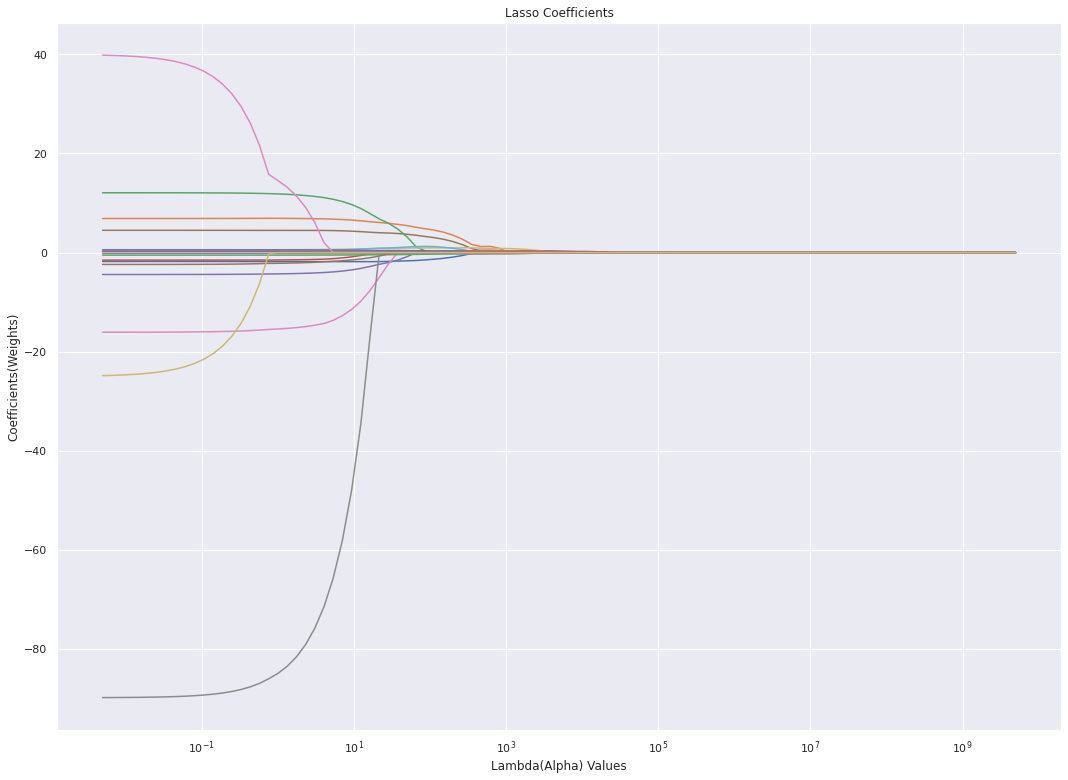

In [73]:
coefficents = Lasso_model_tuning(df, "Salary", results=True, plot=True)

# ElasticNet Regression

📌 It is to find the sum squares error by applying the minimizing coefficients and a penalty to these coefficients. ElasticNet combines L1 and L2 approaches.

In [74]:
def ENet_Regression(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  enet_model = ElasticNet().fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, enet_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, enet_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, enet_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, enet_model.predict(X_test))
    r2_train = r2_score(y_train, enet_model.predict(X_train))
    r2_test = r2_score(y_test, enet_model.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  
  return enet_model


In [75]:
enet_model = ENet_Regression(df, "Salary", results=True)

MSE_train:  84479.881
RMSE_train:  290.654
MSE_test:  135351.540
RMSE_test:  367.902
MAE_train:  211.648
MAE_test:  261.678
R2_train:  0.427
R2_test:  0.439


In [76]:
def ENet_model_tuning(dataframe, target, cv=10, results=False, plot=False):
  import warnings
  warnings.filterwarnings("ignore")
  
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  lambdas = 10**np.linspace(10,-2,100)*0.5
  enet_model = ElasticNetCV(alphas=lambdas, cv=cv).fit(X_train, y_train)
  enet_tuned = ElasticNet(alpha=enet_model.alpha_).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, enet_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, enet_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, enet_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, enet_tuned.predict(X_test))
    r2_train = r2_score(y_train, enet_tuned.predict(X_train))
    r2_test = r2_score(y_test, enet_tuned.predict(X_test))
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  coefficients = []
  if plot:
    enet_model = ElasticNet()
    for i in lambdas:
      enet_model.set_params(alpha=i)
      enet_model.fit(X_train, y_train)
      coefficients.append(enet_model.coef_)
    ax = plt.gca()
    ax.plot(lambdas, coefficients)
    ax.set_xscale("log")
    plt.xlabel("Lambda(Alpha) Values")
    plt.ylabel("Coefficients(Weights)")
    plt.title("ElasticNet Coefficients")
  
  return coefficients

MSE_train:  94403.155
RMSE_train:  307.251
MSE_test:  146828.101
RMSE_test:  383.182
MAE_train:  219.470
MAE_test:  261.144
R2_train:  0.359
R2_test:  0.391


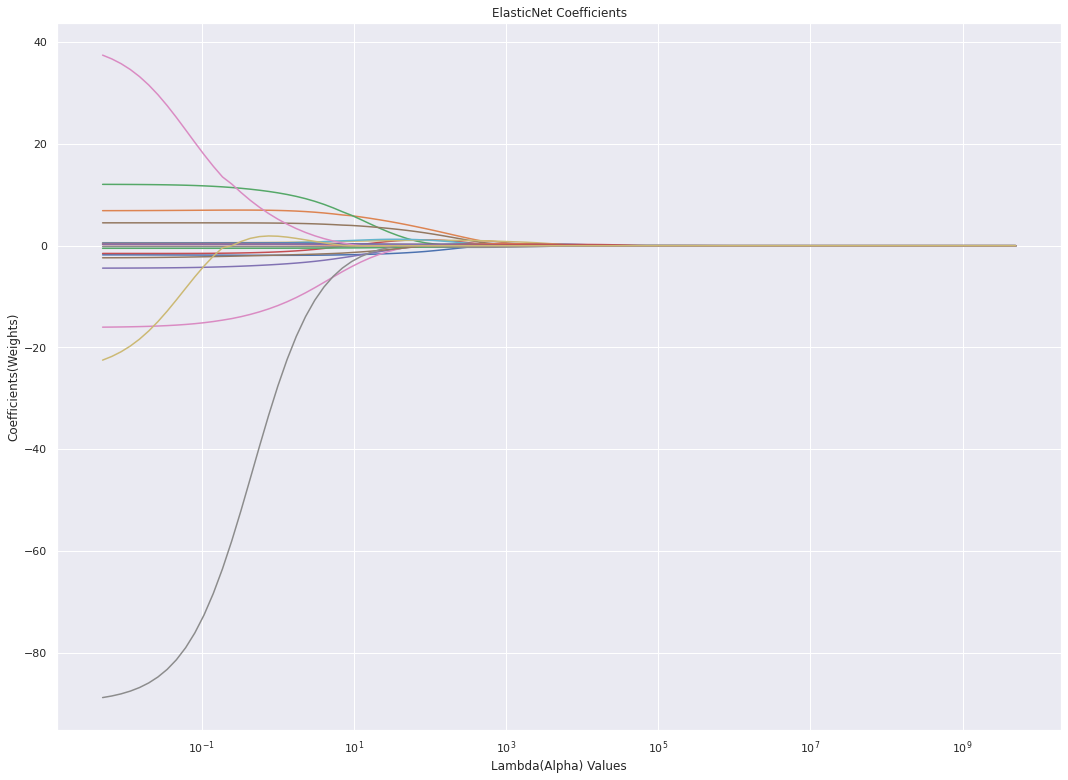

In [77]:
coefficents = ENet_model_tuning(df, "Salary", results=True, plot=True)

# Support Vector Regression(SVR)

📌 The goal is to define the curve so that it can get the maximum point in the range of a margin with the smallest error.

In [78]:
def SVR_simple_model(dataframe, X, y, results=False, plot=False):
  X_col = X
  y_col = y
  X = pd.DataFrame(dataframe[[X]])
  y = pd.DataFrame(dataframe[y])
  svr_model = SVR(kernel="linear").fit(X, y)
  model_equation = str(y_col) + " = " + str("%.2f" % svr_model.intercept_[0]) + " + " + str(X_col) + "*" + str("%.2f" % svr_model.coef_[0][0])

  if results:
    y_pred = svr_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r_sqaure = svr_model.score(X, y)
    print("MSE: ", "%.3f" % mse)
    print("RMSE: ", "%.3f" % rmse)
    print("MAE: ", "%.3f" % mae)
    print("R-Sqaure: ", "%.3f" % r_sqaure)

  if plot:
    g = sns.regplot(x=dataframe[X_col], y=dataframe[y_col], scatter_kws={'color':'r','s':9})
    g.set_title(f"Model Equation:  {model_equation}")
    g.set_ylabel(y_col)
    g.set_xlabel(X_col)
    plt.xlim(dataframe[X_col].min()-10, dataframe[X_col].max()+10)
    plt.ylim(bottom=0)
  return svr_model

MSE:  141928.490
RMSE:  376.734
MAE:  255.972
R-Sqaure:  0.152


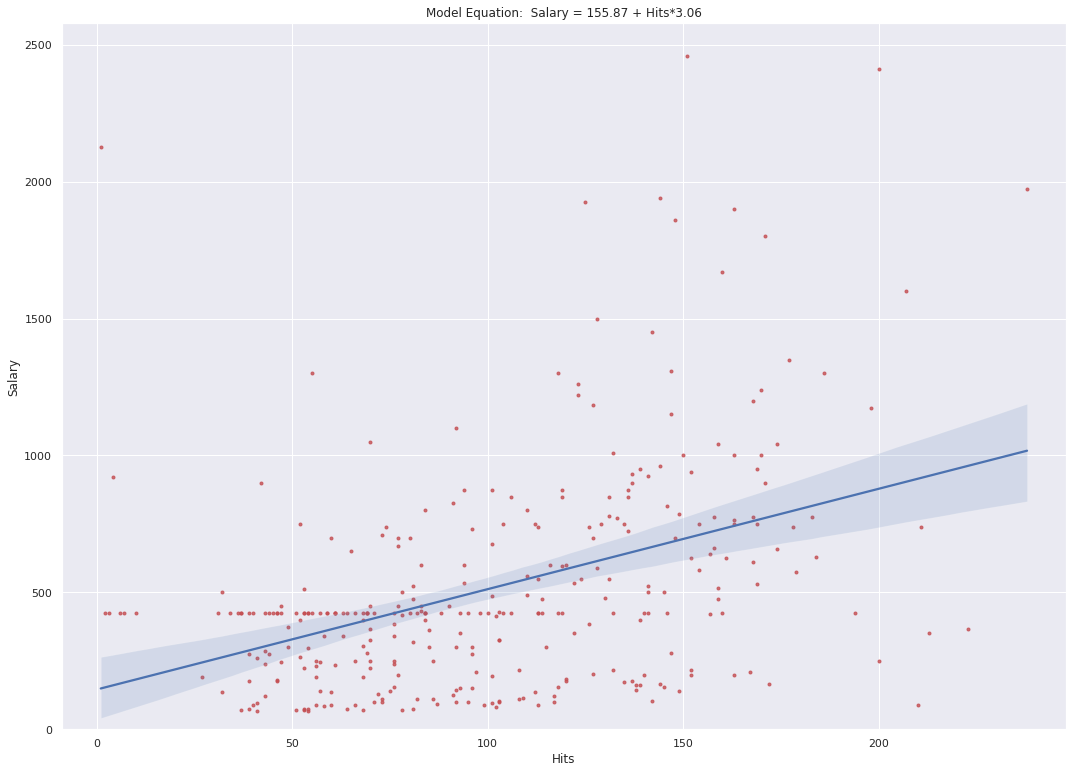

In [79]:
svr_model = SVR_simple_model(df, "Hits", "Salary", results=True, plot=True)

In [80]:
def SVR_simple_model_tuning(dataframe, X, y, Cstart=0.1, Cend=2, Cstep=0.1, cv=10, results=False, plot=False):
  X_col = X
  y_col = y
  SVR_model = SVR_simple_model(dataframe, X, y)
  svr_params = {"C": np.arange(Cstart,Cend,Cstep)}
  X = pd.DataFrame(dataframe[[X]])
  y = pd.DataFrame(dataframe[y])
  svr_cv_model = GridSearchCV(SVR_model, svr_params, cv=cv).fit(X, y)
  svr_model_tuned = SVR(kernel="linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X, y)
  model_equation = str(y_col) + " = " + str("%.2f" % svr_model_tuned.intercept_[0]) + " + " + str(X_col) + "*" + str("%.2f" % svr_model_tuned.coef_[0][0])

  if results:
    y_pred = svr_model_tuned.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r_sqaure = svr_model_tuned.score(X, y)
    print("MSE: ", "%.3f" % mse)
    print("RMSE: ", "%.3f" % rmse)
    print("MAE: ", "%.3f" % mae)
    print("R-Sqaure: ", "%.3f" % r_sqaure)

  if plot:
    g = sns.regplot(x=dataframe[X_col], y=dataframe[y_col], scatter_kws={'color':'r','s':9})
    g.set_title(f"Model Equation:  {model_equation}")
    g.set_ylabel(y_col)
    g.set_xlabel(X_col)
    plt.xlim(dataframe[X_col].min()-10, dataframe[X_col].max()+10)
    plt.ylim(bottom=0)
  return svr_model_tuned

MSE:  141928.490
RMSE:  376.734
MAE:  255.972
R-Sqaure:  0.152


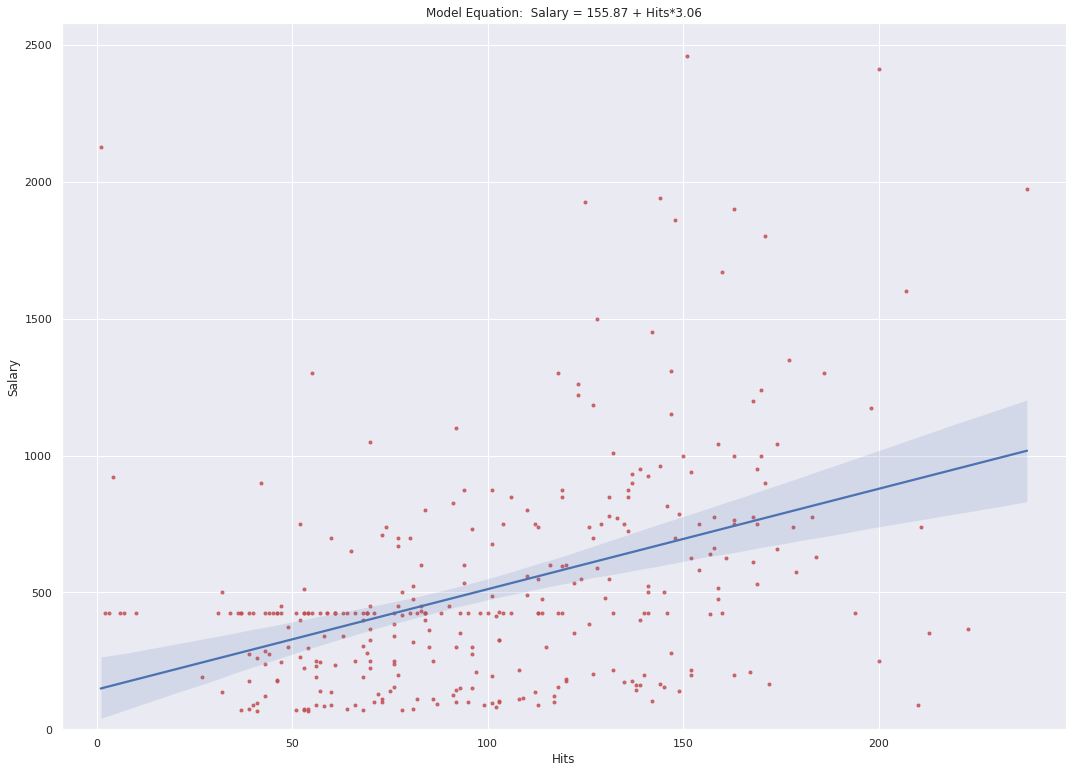

In [81]:
svr_model_tuned = SVR_simple_model_tuning(df, "Hits", "Salary", results=True, plot=True)

In [82]:
def SVR_model(dataframe, target, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  svr_model = SVR(kernel="linear").fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, svr_model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, svr_model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, svr_model.predict(X_train))
    mae_test = mean_absolute_error(y_test, svr_model.predict(X_test))
    r2 = svr_model.score(X, y)
    r2_train = svr_model.score(X_train, y_train)
    r2_test = svr_model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return svr_model

In [83]:
SVR_model = SVR_model(df, "Salary", results=True)

MSE_train:  89895.523
RMSE_train:  299.826
MSE_test:  142156.393
RMSE_test:  377.036
MAE_train:  206.611
MAE_test:  261.936
R2:  0.400
R2_train:  0.390
R2_test:  0.410


In [86]:
def SVR_model_tuning(dataframe, target, Cstart=0.1, Cend=1, Cstep=0.1, cv=10 ,results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  svr_model = SVR(kernel="linear").fit(X_train, y_train)
  svr_params = {"C": np.arange(Cstart,Cend,Cstep)}
  svr_cv_model = GridSearchCV(svr_model, svr_params, cv=cv).fit(X_train, y_train)
  svr_model_tuned = SVR(kernel="linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, svr_model_tuned.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, svr_model_tuned.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, svr_model_tuned.predict(X_train))
    mae_test = mean_absolute_error(y_test, svr_model_tuned.predict(X_test))
    r2 = svr_model_tuned.score(X, y)
    r2_train = svr_model_tuned.score(X_train, y_train)
    r2_test = svr_model_tuned.score(X_test, y_test)
    print("C best Params: ", pd.Series(svr_cv_model.best_params_)[0])
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)

  return svr_model_tuned

In [87]:
SVR_model_tuning = SVR_model_tuning(df, "Salary", results=True)

C best Params:  0.2
MSE_train:  91798.064
RMSE_train:  302.982
MSE_test:  144562.482
RMSE_test:  380.214
MAE_train:  207.137
MAE_test:  261.612
R2:  0.388
R2_train:  0.377
R2_test:  0.400
